In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
bristol_housing = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-cleaned.csv")
cornwall_housing = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-cleaned.csv")

In [34]:
bristol_housing.columns

Index(['sell_id', 'house_sell_price', 'sold_year', 'postcode', 'house-type',
       'town/city', 'district', 'county', 'short_postal_code'],
      dtype='object')

In [5]:
bristol_schools = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol_schools_cleaned.csv")  
cornwall_schools = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall_schools_cleaned.csv")  

Filtering and computing average house prices for 2022 and 2023 by postcode

In [6]:
avg_bristol_prices = bristol_housing[bristol_housing['sold_year'].astype(str).str.startswith(('2022', '2023'))] \
    .groupby('postcode')['house_sell_price'].mean().reset_index(name='Average_Price')

avg_cornwall_prices = cornwall_housing[cornwall_housing['sold_year'].astype(str).str.startswith(('2022', '2023'))] \
    .groupby('postcode')['house_sell_price'].mean().reset_index(name='Average_Price')

Filtering and computing average Attainment 8 scores for 2022 and 2023 by postcode

In [7]:
bristol_schools_filtered = bristol_schools.loc[
    bristol_schools['Year'].isin([2022, 2023]) & 
    ~bristol_schools['ATT8SCR'].isin(['SUPP', 'NE'])
]

bristol_schools_filtered.loc[:, 'ATT8SCR'] = pd.to_numeric(bristol_schools_filtered['ATT8SCR'], errors='coerce')
avg_bristol_att8 = bristol_schools_filtered.groupby('Postcode')['ATT8SCR'].mean().reset_index(name='Average_ATT8')
cornwall_schools_filtered = cornwall_schools.loc[
    cornwall_schools['Year'].isin([2022, 2023]) & 
    ~cornwall_schools['ATT8SCR'].isin(['SUPP', 'NE'])
]
cornwall_schools_filtered.loc[:, 'ATT8SCR'] = pd.to_numeric(cornwall_schools_filtered['ATT8SCR'], errors='coerce')
avg_cornwall_att8 = cornwall_schools_filtered.groupby('Postcode')['ATT8SCR'].mean().reset_index(name='Average_ATT8')


In [8]:
avg_bristol_prices.rename(columns={'postcode': 'Postcode'}, inplace=True)
bristol_combined = pd.merge(avg_bristol_prices, avg_bristol_att8, on='Postcode')

In [9]:
bristol_combined

,Postcode,Average_Price,Average_ATT8
0,BS10 7QH,330000.000000,42.2
1,BS13 9AJ,312000.000000,32.7
2,BS2 0BA,190000.000000,58.8
3,BS4 1NN,183333.333333,2.3
4,BS6 7EH,7500.000000,60.7
5,BS7 0PU,215000.000000,2.3


In [10]:
bristol_combined['Average_ATT8'] = pd.to_numeric(bristol_combined['Average_ATT8'], errors='coerce')
bristol_combined['Average_Price'] = pd.to_numeric(bristol_combined['Average_Price'], errors='coerce')
bristol_combined = bristol_combined.dropna(subset=['Average_ATT8', 'Average_Price'])

In [11]:
correlation_bristol = bristol_combined[['Average_Price', 'Average_ATT8']].corr().iloc[0, 1]
print("Correlation Cornwall:", correlation_bristol)

Correlation Cornwall: -0.2905864164320839


Creating and summarizing linear model for Bristol

In [12]:
X_bristol = bristol_combined[['Average_ATT8']]
y_bristol = bristol_combined['Average_Price']

model_bristol = LinearRegression().fit(X_bristol, y_bristol)
y_pred_bristol = model_bristol.predict(X_bristol)
print("R^2 Score Bristol:", r2_score(y_bristol, y_pred_bristol))

R^2 Score Bristol: 0.08444046541484052


In [13]:
model = sm.OLS(y_bristol, X_bristol).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Average_Price   R-squared (uncentered):                   0.417
Model:                            OLS   Adj. R-squared (uncentered):              0.301
Method:                 Least Squares   F-statistic:                              3.580
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                       0.117
Time:                        15:51:58   Log-Likelihood:                         -81.014
No. Observations:                   6   AIC:                                      164.0
Df Residuals:                       5   BIC:                                      163.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


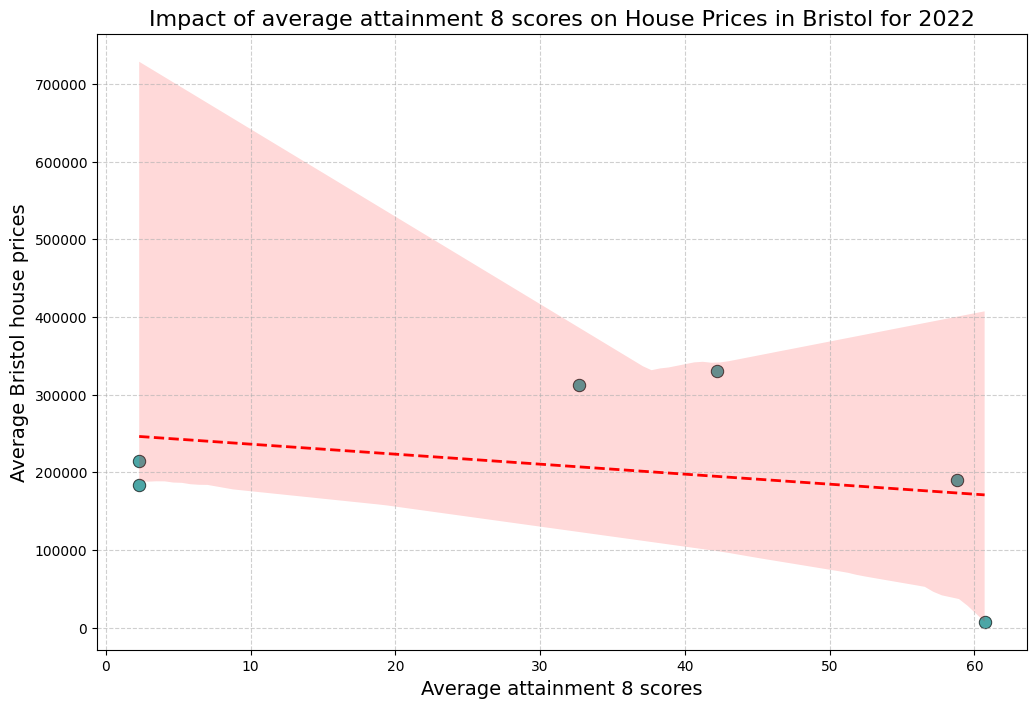

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average_ATT8', y='Average_Price', data=bristol_combined, color='teal', s=80, edgecolor='black', alpha=0.7)
sns.regplot(x='Average_ATT8', y='Average_Price', data=bristol_combined, scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})
plt.title('Impact of average attainment 8 scores on House Prices in Bristol for 2022', fontsize=16)
plt.xlabel('Average attainment 8 scores', fontsize=14)
plt.ylabel('Average Bristol house prices', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Now for Cornwall

In [14]:
avg_cornwall_prices.rename(columns={'postcode': 'Postcode'}, inplace=True)
cornwall_combined = pd.merge(avg_cornwall_prices, avg_cornwall_att8, on='Postcode')

In [15]:
cornwall_combined

,Postcode,Average_Price,Average_ATT8
0,PL15 8HN,272900.0,55.9
1,TR2 5SE,685000.0,51.45


In [16]:
cornwall_combined['Average_ATT8'] = pd.to_numeric(cornwall_combined['Average_ATT8'], errors='coerce')
cornwall_combined['Average_Price'] = pd.to_numeric(cornwall_combined['Average_Price'], errors='coerce')
cornwall_combined = cornwall_combined.dropna(subset=['Average_ATT8', 'Average_Price'])

Correlation coefficient for Cornwall

In [17]:
correlation_cornwall = cornwall_combined[['Average_Price', 'Average_ATT8']].corr().iloc[0, 1]
print("Correlation Cornwall:", correlation_cornwall)

Correlation Cornwall: -0.9999999999999992


In [18]:
X_cornwall = cornwall_combined[['Average_ATT8']]
y_cornwall = cornwall_combined['Average_Price']

In [21]:
model_cornwall = LinearRegression().fit(X_cornwall, y_cornwall)
y_pred_cornwall = model_cornwall.predict(X_cornwall)
print("R^2 Score Cornwall:", r2_score(y_cornwall, y_pred_cornwall))

R^2 Score Cornwall: 1.0


In [22]:
model = sm.OLS(y_cornwall, X_cornwall).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Average_Price   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              4.336
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                       0.285
Time:                        15:53:48   Log-Likelihood:                         -27.492
No. Observations:                   2   AIC:                                      56.98
Df Residuals:                       1   BIC:                                      55.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


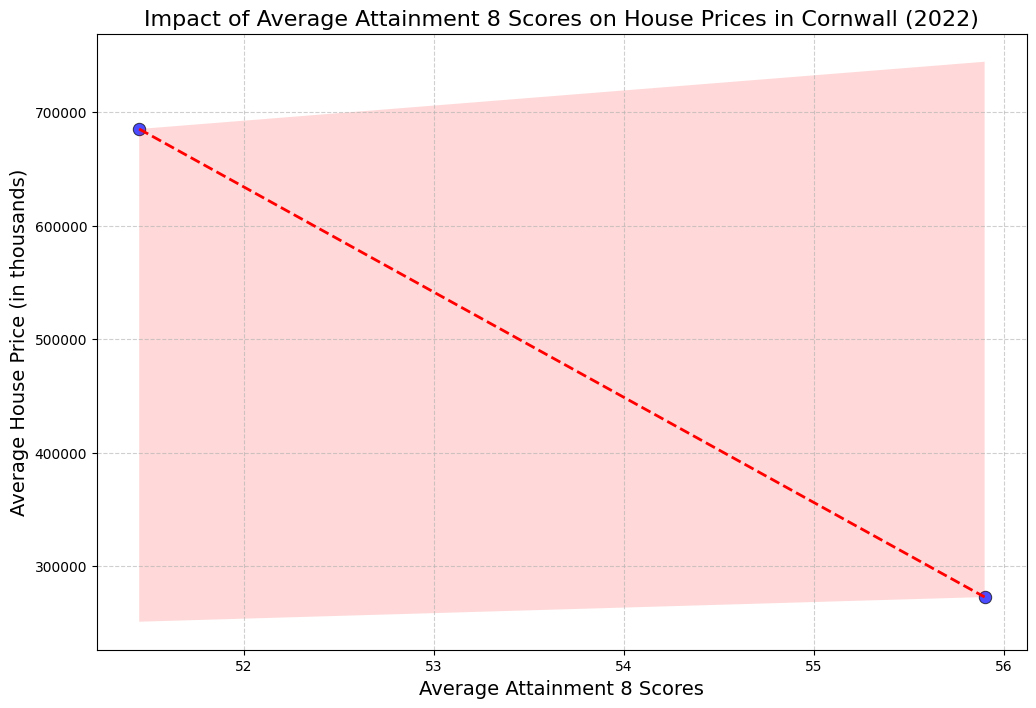

In [51]:
# Plot for Cornwall
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average_ATT8', y='Average_Price', data=cornwall_combined, color='blue', s=80, edgecolor='black', alpha=0.7)
sns.regplot(x='Average_ATT8', y='Average_Price', data=cornwall_combined, scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})
plt.title('Impact of Average Attainment 8 Scores on House Prices in Cornwall (2022)', fontsize=16)
plt.xlabel('Average Attainment 8 Scores', fontsize=14)
plt.ylabel('Average House Price (in thousands)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()